In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, matthews_corrcoef, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
# Step 1: Load the dataset
data_file = r'E:\AAASchoolLearning\StudyResource\GraduateNTU\ProjectSum\DSThinkingProject\SVMmodel\S1Data.csv'
data = pd.read_csv(data_file)

In [4]:
# Step 2: Separate features and target
X = data.drop(['Event', 'TIME'], axis=1)  # Features
y = data['Event']  # Target (Event column)
feature_names = X.columns

In [5]:
# Step 3: Initialize results dictionary for multiple runs
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {kernel: {'accuracy': [], 'f1_score': [], 'roc_auc': [], 'mcc': []} for kernel in kernels}
feature_rankings = []

In [11]:
# Step 4: Run the experiment 100 times
for i in range(100):
    print(f'\nExperiment {i+1}/100')
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Standardize the feature data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train and evaluate the SVM models with different kernels
    for kernel in kernels:
        svm_model = SVC(kernel=kernel, probability=True, random_state=42)
        svm_model.fit(X_train, y_train)

        # Make predictions
        y_prob = svm_model.predict_proba(X_test)[:, 1] if len(np.unique(y)) == 2 else None
        y_pred = (y_prob >= 0.5).astype(int) if y_prob is not None else svm_model.predict(X_test)
        # y_pred = svm_model.predict(X_test)

        # Collect the evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_test, y_prob, average='weighted') if y_prob is not None else None
        mcc = matthews_corrcoef(y_test, y_pred)

        results[kernel]['accuracy'].append(accuracy)
        results[kernel]['f1_score'].append(f1)
        results[kernel]['roc_auc'].append(roc_auc)
        results[kernel]['mcc'].append(mcc)

        # Step 5: Feature Ranking for Linear Kernel
        if kernel == 'linear':
            feature_importance = np.abs(svm_model.coef_[0])
            feature_ranking = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
            feature_rankings.append([feature for feature, _ in feature_ranking])


Experiment 1/100

Experiment 2/100

Experiment 3/100

Experiment 4/100

Experiment 5/100

Experiment 6/100

Experiment 7/100

Experiment 8/100

Experiment 9/100

Experiment 10/100

Experiment 11/100

Experiment 12/100

Experiment 13/100

Experiment 14/100

Experiment 15/100

Experiment 16/100

Experiment 17/100

Experiment 18/100

Experiment 19/100

Experiment 20/100

Experiment 21/100

Experiment 22/100

Experiment 23/100

Experiment 24/100

Experiment 25/100

Experiment 26/100

Experiment 27/100

Experiment 28/100

Experiment 29/100

Experiment 30/100

Experiment 31/100

Experiment 32/100

Experiment 33/100

Experiment 34/100

Experiment 35/100

Experiment 36/100

Experiment 37/100

Experiment 38/100

Experiment 39/100

Experiment 40/100

Experiment 41/100

Experiment 42/100

Experiment 43/100

Experiment 44/100

Experiment 45/100

Experiment 46/100

Experiment 47/100

Experiment 48/100

Experiment 49/100

Experiment 50/100

Experiment 51/100

Experiment 52/100

Experiment 53/100

E

In [12]:
# Step 6: Calculate average feature ranking
feature_rank_count = defaultdict(int)
for ranking in feature_rankings:
    for rank, feature in enumerate(ranking):
        feature_rank_count[feature] += rank + 1

average_ranking = sorted(feature_rank_count.items(), key=lambda x: x[1] / len(feature_rankings))

print("\nAverage Feature Ranking:")
for rank, (feature, total_rank) in enumerate(average_ranking, start=1):
    print(f"{rank}. Feature: {feature}, Average Rank: {total_rank / len(feature_rankings):.2f}")


Average Feature Ranking:
1. Feature: Creatinine, Average Rank: 1.56
2. Feature: Ejection.Fraction, Average Rank: 1.64
3. Feature: Age, Average Rank: 2.94
4. Feature: CPK, Average Rank: 5.69
5. Feature: Sodium, Average Rank: 5.98
6. Feature: BP, Average Rank: 6.45
7. Feature: Gender, Average Rank: 7.24
8. Feature: Smoking, Average Rank: 8.13
9. Feature: Anaemia, Average Rank: 8.60
10. Feature: Diabetes, Average Rank: 8.80
11. Feature: Pletelets, Average Rank: 8.97


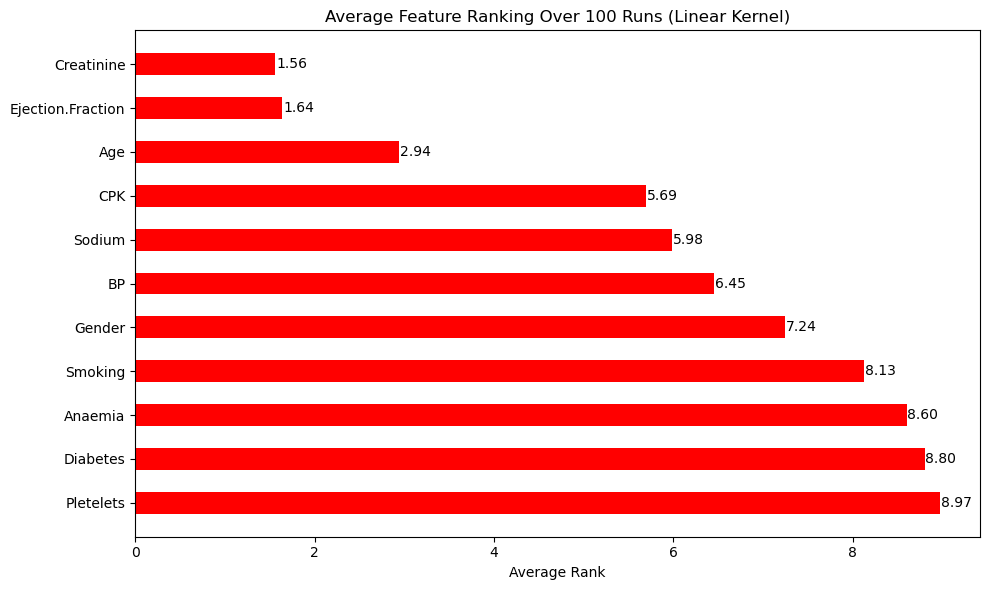

In [13]:
# Visualize the average feature ranking
features, avg_ranks = zip(*[(feature, total_rank / len(feature_rankings)) for feature, total_rank in average_ranking])
plt.figure(figsize=(10, 6))
plt.barh(features, avg_ranks, color='red', height=0.5)
plt.xlabel('Average Rank')
plt.title('Average Feature Ranking Over 100 Runs (Linear Kernel)')
plt.gca().invert_yaxis()
for i, v in enumerate(avg_ranks):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center')
plt.tight_layout()
plt.show()

In [14]:
# Step 7: Aggregate the results
final_results = {
    'kernel': [],
    'accuracy': [],
    'f1_score': [],
    'roc_auc': [],
    'mcc': []
}

for kernel in kernels:
    final_results['kernel'].append(kernel)
    final_results['accuracy'].append(np.mean(results[kernel]['accuracy']))
    final_results['f1_score'].append(np.mean(results[kernel]['f1_score']))
    final_results['roc_auc'].append(np.nanmean(results[kernel]['roc_auc']))  # Use nanmean to ignore None values
    final_results['mcc'].append(np.mean(results[kernel]['mcc']))

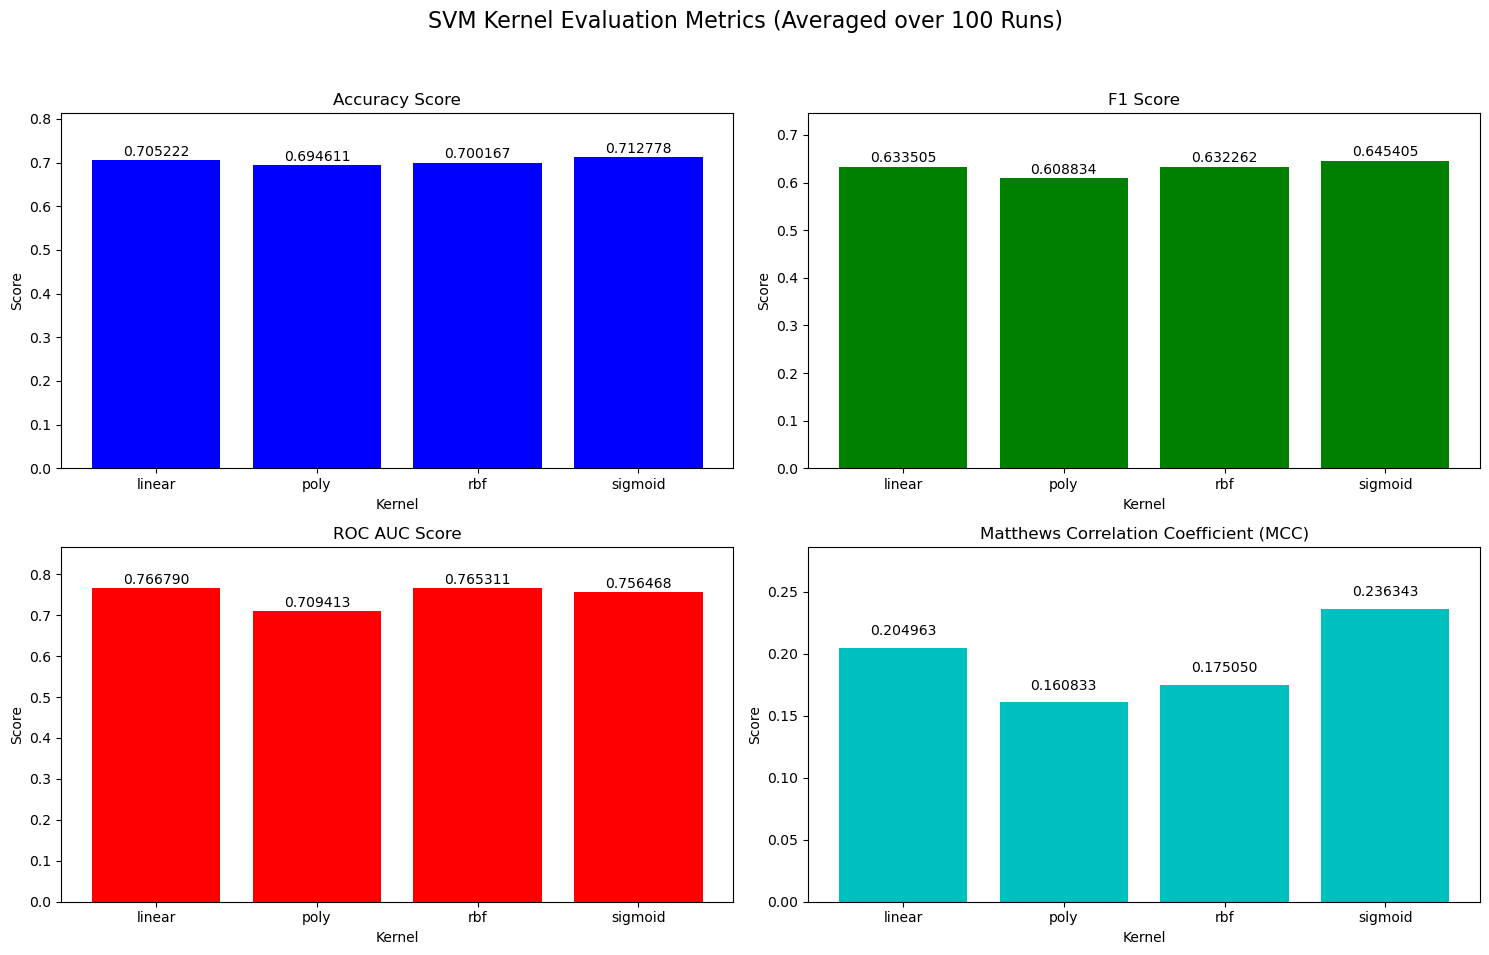

In [15]:
# Step 8: Visualize the results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SVM Kernel Evaluation Metrics (Averaged over 100 Runs)', fontsize=16)

# Accuracy Plot
axes[0, 0].bar(final_results['kernel'], final_results['accuracy'], color='b', width=0.8)
axes[0, 0].set_title('Accuracy Score')
axes[0, 0].set_xlabel('Kernel')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_ylim(0, max(final_results['accuracy']) + 0.1)
for i, v in enumerate(final_results['accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.6f}', ha='center')

# F1 Score Plot
axes[0, 1].bar(final_results['kernel'], final_results['f1_score'], color='g', width=0.8)
axes[0, 1].set_title('F1 Score')
axes[0, 1].set_xlabel('Kernel')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_ylim(0, max(final_results['f1_score']) + 0.1)
for i, v in enumerate(final_results['f1_score']):
    axes[0, 1].text(i, v + 0.01, f'{v:.6f}', ha='center')

# ROC AUC Plot (only if available)
if any(final_results['roc_auc']):
    axes[1, 0].bar(final_results['kernel'], [v if not np.isnan(v) else 0 for v in final_results['roc_auc']], color='r', width=0.8)
    axes[1, 0].set_title('ROC AUC Score')
    axes[1, 0].set_xlabel('Kernel')
    axes[1, 0].set_ylabel('Score')
    axes[1, 0].set_ylim(0, max([v for v in final_results['roc_auc'] if not np.isnan(v)]) + 0.1)
    for i, v in enumerate(final_results['roc_auc']):
        if not np.isnan(v):
            axes[1, 0].text(i, v + 0.01, f'{v:.6f}', ha='center')

# MCC Plot
axes[1, 1].bar(final_results['kernel'], final_results['mcc'], color='c', width=0.8)
axes[1, 1].set_title('Matthews Correlation Coefficient (MCC)')
axes[1, 1].set_xlabel('Kernel')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_ylim(0, max(final_results['mcc']) + 0.05)
for i, v in enumerate(final_results['mcc']):
    axes[1, 1].text(i, v + 0.01, f'{v:.6f}', ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()